<a href="https://www.kaggle.com/code/biswasbarsha/breast-cancer-detection?scriptVersionId=263030019" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv
/kaggle/input/pm-92167866-at-09-20-2025-18-48-32/__script__.py
/kaggle/input/pm-92167866-at-09-20-2025-18-48-32/__results__.html
/kaggle/input/pm-92167866-at-09-20-2025-18-48-32/input_requirements.txt
/kaggle/input/pm-92167866-at-09-20-2025-18-48-32/__script__.ipynb
/kaggle/input/pm-92167866-at-09-20-2025-18-48-32/__output__.json
/kaggle/input/pm-92167866-at-09-20-2025-18-48-32/custom.css


# Load and Explore Data

In [2]:
#load data on dataframe
data = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")

In [3]:
#display dataframe
data

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
#Number of rows and columns
data.shape

(569, 33)

In [5]:
#find if there's any Null value
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

###  If we can see, Only Unnamed: 32 is having NaN(Null) value. And total Null value is equal to the Number of Rows. So, we can delete it.

In [6]:
#drop a column with Null values
data = data.drop(columns='Unnamed: 32')

In [7]:
#display updated dataframe
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
# count of rows & columns
data.shape

(569, 32)

In [9]:
#count of "M": Cancerous and "B": Non-Cancerous cells in diagnosis
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

As this dataset is imbalance, we can balance the dataset by using either undersampling or oversampling.

Here, Oversampling will be used.

# Label Encoding

In [10]:
#get datatype of each column in out dataset
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

Column "id" signifies the id of a patient which is uniques for all. This will not be useful to train our model

Also, Column "diagnosis" is of object datatype which is not compatible for a model. So, we'll encode it.


**M = 1; B = 0**


In [11]:
data['diagnosis'].values

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [12]:
#Encode the diagnosis values
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'].values)

In [13]:
#display dataframe
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Split Dataset & Feature Selection

In [14]:
#Splitting the dataset into independent and dependent datasets
X = data.iloc[:,2:]
y = data.iloc[:,1]

In [15]:
!pip install -U imbalanced-learn scikit-learn

INFO: pip is looking at multiple versions of imbalanced-learn to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install imbalanced-learn==0.13.0 and scikit-learn because these package versions have conflicting dependencies.

The conflict is caused by:
    The user requested scikit-learn
    imbalanced-learn 0.13.0 depends on scikit-learn<2 and >=1.3.2

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip to attempt to solve the dependency conflict

ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [16]:
#Splitting dataset into training and testing->75:25
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [17]:
#Scaling the data(feature scaling)
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.fit_transform(X_test)

In [18]:
#Print data
print(X_train)
print("**************************************")
print(X_test)

[[-3.02550143e-01  1.04185849e-03 -2.84035662e-01 ... -2.33495443e-01
   1.03962883e+00  4.76284664e-01]
 [-8.12965818e-02 -1.37574225e+00 -1.40709588e-01 ... -8.48369352e-01
  -1.56257916e-01 -8.96527687e-01]
 [ 2.60386133e-01  6.26029380e-01  2.42707906e-01 ...  2.54947292e-01
   3.69746605e-01  5.25479036e-01]
 ...
 [-6.47033537e-01  1.88991005e-01 -6.24941185e-01 ... -5.28956303e-01
   3.77481965e-01 -2.06070210e-01]
 [-1.12104040e-01 -9.50026110e-01 -1.32207194e-01 ... -1.30106881e-01
   7.16290759e-01  7.49458117e-01]
 [-5.12600993e-01  4.85952569e-02 -5.26151461e-01 ... -9.06918874e-02
  -3.96054094e-01 -9.78425923e-02]]
**************************************
[[ 0.02768978  0.16502166  0.05316984 ...  0.61815016 -0.21873907
   0.40086144]
 [ 1.62844512  0.62197312  1.58926682 ...  1.01187053  0.45962023
  -0.14595586]
 [-0.09132549 -0.88417975 -0.16010427 ... -0.52966052 -1.34034449
  -0.91538456]
 ...
 [-0.3977898  -1.24923036 -0.40041927 ... -0.89497127 -0.76990599
   0.767896

!pip install imbalanced-learn

from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline

oversampler_random = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_train, y_train = oversampler_random.fit_resample(X_train, y_train)
print("Class distribution after RandomOverSampler:", Counter(y_train))

# Bulid a Logistic Regression Model

In [19]:
#Build a logistic regression classifier
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [20]:
#make use of trained model to make predictions on test data

predict = logistic_regression.predict(X_test)

# Performance Evaluation

In [21]:
#Plot Confusion metrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predict)

[[87  0]
 [ 3 53]]


<Axes: >

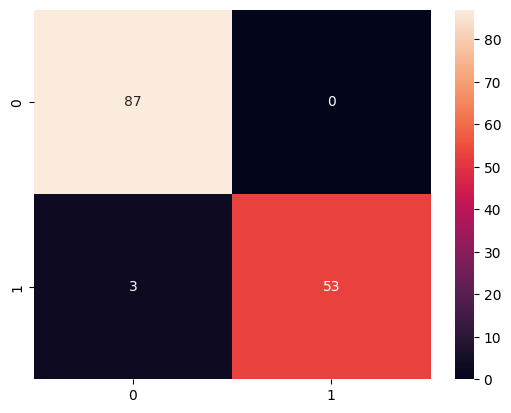

In [22]:
import seaborn as sb
print(confusion_matrix)
sb.heatmap(confusion_matrix, annot=True)

In [23]:
#Get accuracy of the model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predict))

0.9790209790209791


In [24]:
print(y_test.values)

[1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1
 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0
 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1
 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0]


In [25]:
print(predict)

[1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1
 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0
 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1
 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0]
